INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 720x288 with 3 Axes>,
 <AxesSubplot:title={'center':'Raster Plot'}, ylabel='neuron #'>,
 <AxesSubplot:title={'center':'Population Activity'}, ylabel='A(t) [Hz]'>,
 <AxesSubplot:title={'center':'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

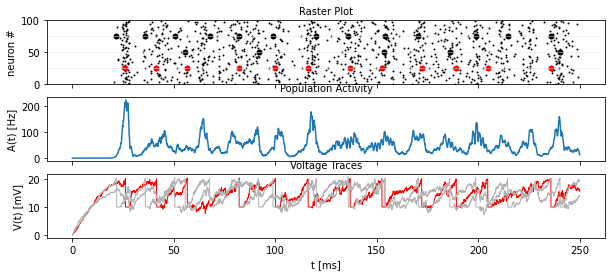

In [1]:
%matplotlib inline
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools
import brian2 as b2

rate_monitor, spike_monitor, \
voltage_monitor, monitored_spike_idx = \
    LIF_spiking_network.simulate_brunel_network(sim_time=250. * b2.ms)

plot_tools.plot_network_activity(
    rate_monitor, spike_monitor, voltage_monitor,
    spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)

In [3]:
# Default parameters of a single LIF neuron:
V_REST = 0. * b2.mV
V_RESET = +10. * b2.mV
FIRING_THRESHOLD = +20. * b2.mV
MEMBRANE_TIME_SCALE = 20. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

# Default parameters of the network
SYNAPTIC_WEIGHT_W0 = 0.1 * b2.mV  # note: w_ee=w_ie = w0 and = w_ei=w_ii = -g*w0
RELATIVE_INHIBITORY_STRENGTH_G = 4.  # balanced
CONNECTION_PROBABILITY_EPSILON = 0.1
SYNAPTIC_DELAY = 1.5 * b2.ms
POISSON_INPUT_RATE = 12. * b2.Hz
N_POISSON_INPUT = 1000


10. Hz


(<Figure size 720x288 with 3 Axes>,
 <AxesSubplot:title={'center':'Raster Plot'}, ylabel='neuron #'>,
 <AxesSubplot:title={'center':'Population Activity'}, ylabel='A(t) [Hz]'>,
 <AxesSubplot:title={'center':'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

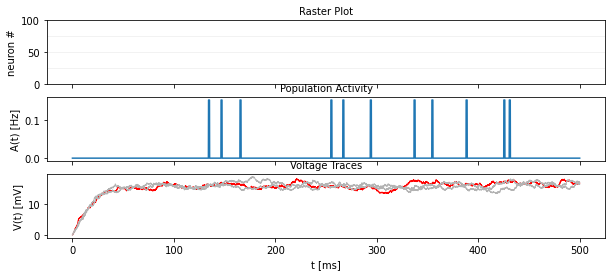

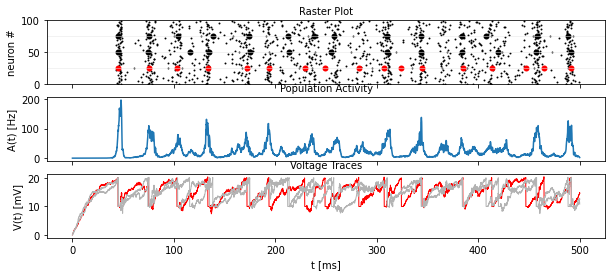

In [10]:
freq_threshold = FIRING_THRESHOLD/(N_POISSON_INPUT*SYNAPTIC_WEIGHT_W0*MEMBRANE_TIME_SCALE)
print(freq_threshold)
rate_monitor, spike_monitor, \
voltage_monitor, monitored_spike_idx = \
    LIF_spiking_network.simulate_brunel_network(sim_time=500. * b2.ms,
                                                poisson_input_rate=freq_threshold*0.8)

plot_tools.plot_network_activity(
    rate_monitor, spike_monitor, voltage_monitor,
    spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)

rate_monitor, spike_monitor, \
voltage_monitor, monitored_spike_idx = \
    LIF_spiking_network.simulate_brunel_network(sim_time=500. * b2.ms,
                                                poisson_input_rate=freq_threshold)

plot_tools.plot_network_activity(
    rate_monitor, spike_monitor, voltage_monitor,
    spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)

WARNING    C:\Users\maxyc\miniconda3\envs\jupy\lib\site-packages\brian2\units\fundamentalunits.py:230: RuntimeWarning: Mean of empty slice.
  return Quantity(func(np.array(x, copy=False), *args, **kwds), dim=x.dim)
 [py.warnings]
WARNING    C:\Users\maxyc\miniconda3\envs\jupy\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]


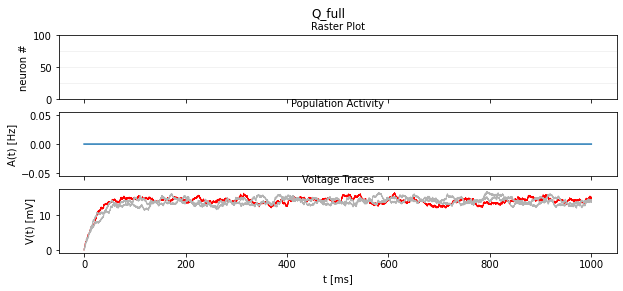

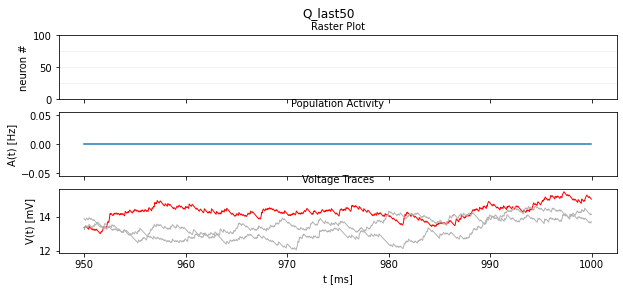

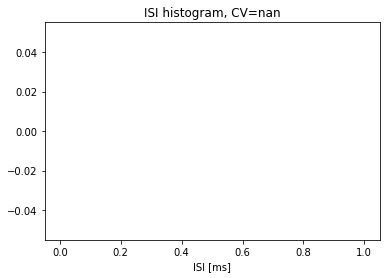

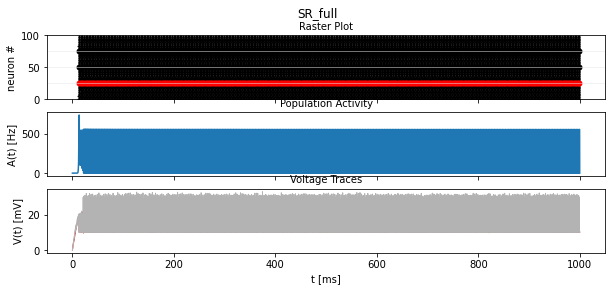

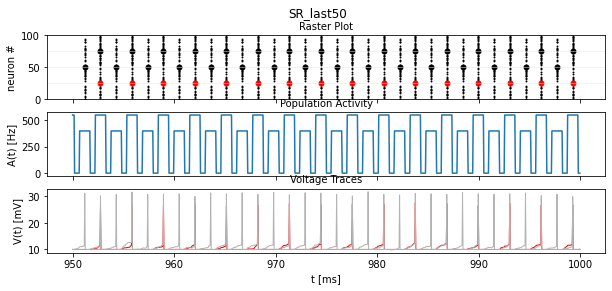

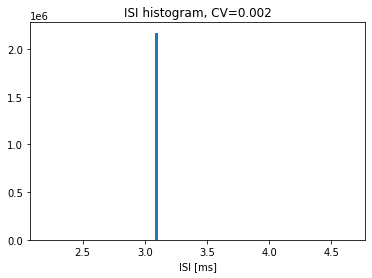

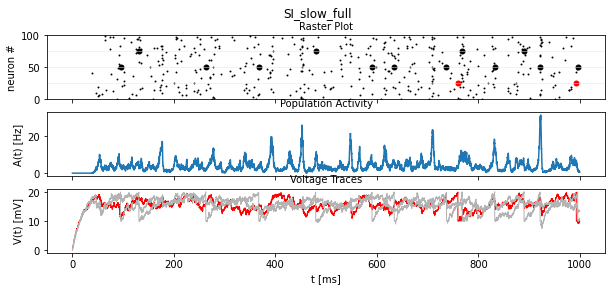

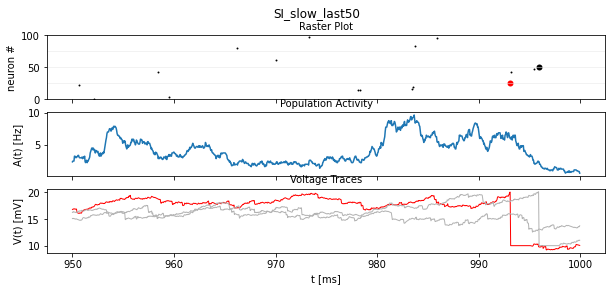

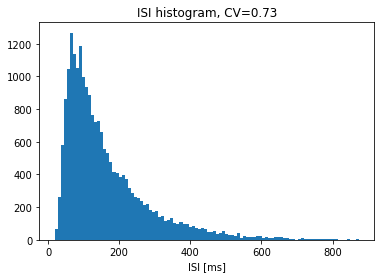

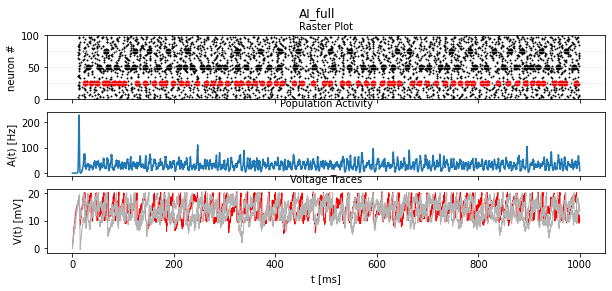

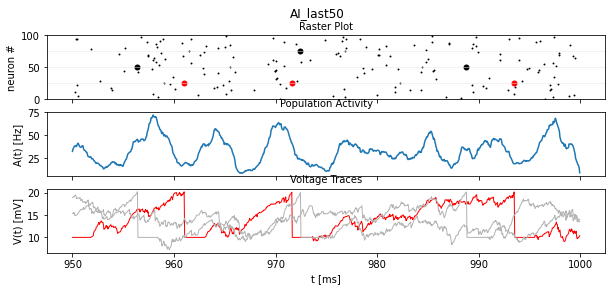

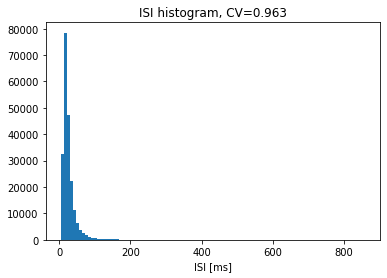

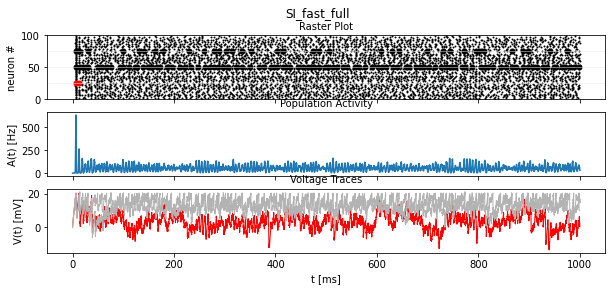

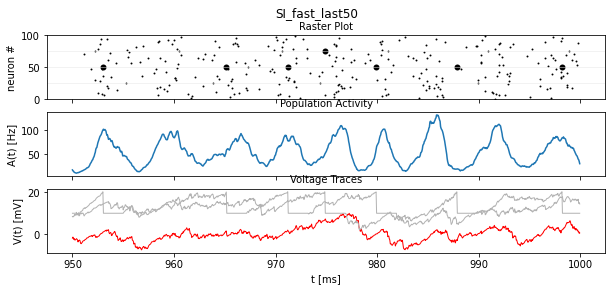

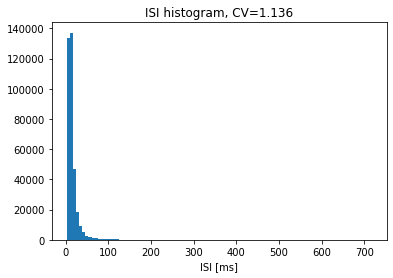

In [17]:
from neurodynex3.tools import plot_tools, spike_tools
def tmp_plot(input_, g_, name):
    rate_monitor, spike_monitor, \
    voltage_monitor, monitored_spike_idx = \
        LIF_spiking_network.simulate_brunel_network(
            sim_time=1000. * b2.ms, N_Excit=6000, N_Inhib=1500,
            poisson_input_rate=freq_threshold*input_, g=g_
        )

    plot_tools.plot_network_activity(
        rate_monitor, spike_monitor, voltage_monitor,
        spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms, sup_title=name+'_full')

    plot_tools.plot_network_activity(
        rate_monitor, spike_monitor, voltage_monitor,
        spike_train_idx_list=monitored_spike_idx, t_min=950.*b2.ms, sup_title=name+'_last50')

    spike_stats = spike_tools.get_spike_train_stats(spike_monitor, window_t_min= 100 *b2.ms)
    plot_tools.plot_ISI_distribution(spike_stats, hist_nr_bins=100)

tmp_plot(0.7, 4, 'Q')
tmp_plot(2, 2, 'SR')
tmp_plot(0.95, 6, 'SI_slow')
tmp_plot(2, 6, 'AI')
tmp_plot(3.5, 7, 'SI_fast')

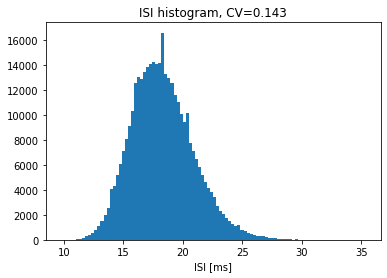

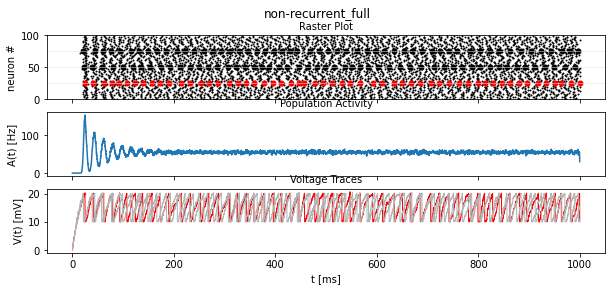

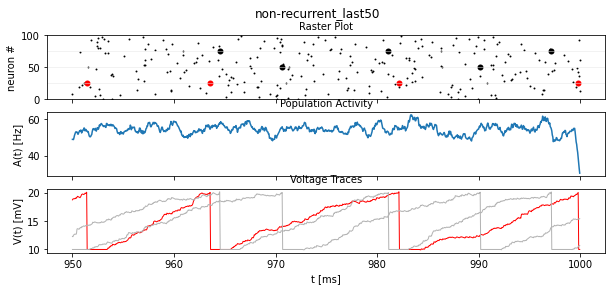

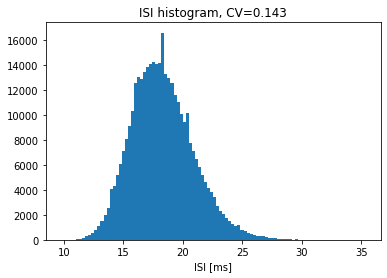

In [18]:
rate_monitor, spike_monitor, \
voltage_monitor, monitored_spike_idx = \
LIF_spiking_network.simulate_brunel_network(
    sim_time=1000. * b2.ms, N_Excit=6000, N_Inhib=1500,
    poisson_input_rate=14*b2.Hz, g=2.5,
    w0=0.*b2.mV, w_external=LIF_spiking_network.SYNAPTIC_WEIGHT_W0
)

plot_tools.plot_network_activity(
    rate_monitor, spike_monitor, voltage_monitor,
    spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms, sup_title='non-recurrent'+'_full')

plot_tools.plot_network_activity(
    rate_monitor, spike_monitor, voltage_monitor,
    spike_train_idx_list=monitored_spike_idx, t_min=950.*b2.ms, sup_title='non-recurrent' +'_last50')

spike_stats = spike_tools.get_spike_train_stats(spike_monitor, window_t_min= 100 *b2.ms)
plot_tools.plot_ISI_distribution(spike_stats, hist_nr_bins=100)

